In [1]:
# Render plots inline
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand
import json
# adjust dimensions of plot area to make it look better
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
def make_df(csv_path):
    """
    Generates a pandas DataFrame for the
    data given in the csv file specified
    by the 'csv_path'.

    Argument:
        csv_path - specifies path to desired csv file
    Returns:
        pandas DataFrame with data from csv file specified in csv_path
        
    """
    return pd.read_csv(csv_path, header=None, names=['x', 'y'], index_col=False)

In [4]:
def make_data_matrix(x_values, degree):
    """
    Generates a N x (degree+1) dimension
    matrix from the input values (x values)
    of the given dataset. The ith feature (column)
    in the matrix (i=0 to degree+1 (exclusive))
    is - the N input points raised to the power i.
    
    Arguments:
        x_values - list containing the input data points
        degree - desired degree of the polynomial
    Returns:
        An Nx(degree+1) matrix where ith feature/column
        is the N data points raised to the power i
    """
    X_data = []
    for x_val in x_values:
        col = []
        for power in range(degree+1):
            col.append(x_val ** power)
        X_data.append(col)
    X_matrix = np.array(X_data)
    return X_matrix

In [5]:
def find_predictions(data_matrix, params_vector):
    """
    Gives a Nx1 vector where each entry is the predicted
    value for y, which is calculated using the parameters vector
    obtained from the find_params_vector() method and a row/example
    from the data matrix.
    
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
    """
    return np.array([row.dot(params_vector) for row in data_matrix])

In [6]:
def find_params_over_epochs(init_step_size, data_x, data_y, num_examples):
    w0 = 0
    w1 = 0
    stop = False
    count = 0
    params_over_epochs = {}
    while not stop:
        params_over_epochs[count] = [w0, w1]
        for i in range(num_examples):
            idx = rand.randint(0, num_examples-1)
            prediction = w0 + w1*data_x[idx]
            error = prediction - data_y[idx]
            
            new_w0 = w0 - init_step_size*error
            new_w1 = w1 - init_step_size*error*data_x[idx]
            
            diff_w0 = abs(new_w0 - w0)
            diff_w1 = abs(new_w1 - w1)
            if diff_w0 < 0.0000001*w0 and diff_w1 < 0.0000001*w1:
                stop = True
                break
            w0 = new_w0
            w1 = new_w1
        
        count +=1
    
    return params_over_epochs

In [7]:
def find_mse(data_matrix, params_vector, y_values):
    """
    Steps for finding the Mean Square Error - 
    1. Get the prediction values for the input
        data points based on the model found.
    2. Calculate the error vector by differencing
        the vector containing target values and 
        the vector containing the predicted values.
    3. Take the square of the errors found and sum them 
        by taking dot product of the error vector with itself.
    4. Calculate the MSE by dividing the sum of the
        squares of errors with the number of input data points.
        
    Arguments:
        data_matrix - matrix generated by the make_data_matrix()
                        method using the input data points - An 
                        Nx(degree+1) matrix where ith feature/column
                        is the N data points raised to the power i
        params_vector - vector containing the values for the parameters that
                        minimize the error function (i.e. solution obtained for w*)
                        from the find_params_vector() method
        y_values - list of output data points from given dataset
    Returns:
        Mean Square Error of model for given data set
    """
    y_predictions = find_predictions(data_matrix, params_vector)
    error = y_values - y_predictions
    error_square = error.dot(error)
    mse = error_square/len(y_values)
    return mse

In [8]:
def find_list_mses(data_matrix, params_over_epochs, y_values):
    params_keys = sorted(params_over_epochs.keys())
    dataset_list_mses = []
    for key in params_keys:
        params = params_over_epochs[key]
        dataset_mse = find_mse(data_matrix, params, y_values)
        dataset_list_mses.append(dataset_mse)
    
    return dataset_list_mses

In [9]:
init_step_size = 10 ** (-6)

In [10]:
train_df = make_df('./Datasets/Dataset_2_train.csv')

In [11]:
train_x = train_df['x']
train_y = train_df['y']
num_examples = len(train_x)

In [12]:
train_matrix = make_data_matrix(train_x, 1)

In [13]:
params_over_epochs = find_params_over_epochs(init_step_size, train_x, train_y, num_examples)

In [14]:
# for key, p in params_over_epochs.items():
#     print(key, ':', p)

In [15]:
# print(type(params_over_epochs))

In [16]:
# with open("params_over_epochs.json", "w") as f:
#     json.dump(params_over_epochs, f)

In [17]:
# loaded_json = {}
# with open("params_over_epochs.json", "r") as f:
#     loaded_json = json.load(f)
# print(type(loaded_json))

In [18]:
# for key, p in loaded_json.items():
#     print(key, ':', p)

In [19]:
valid_df = make_df('./Datasets/Dataset_2_valid.csv')

In [20]:
valid_x = valid_df['x']
valid_y = valid_df['y']

In [21]:
valid_matrix = make_data_matrix(valid_x, 1)

In [22]:
list_valid_mses = np.array(find_list_mses(valid_matrix, params_over_epochs, valid_y))

In [23]:
list_train_mses = np.array(find_list_mses(train_matrix, params_over_epochs, train_y))

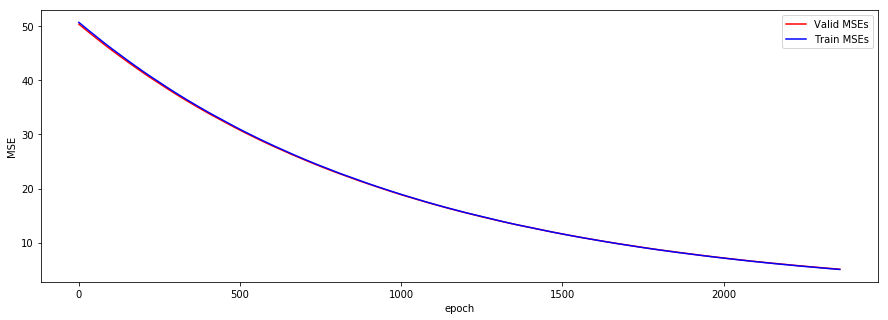

In [24]:
plt.plot(sorted(params_over_epochs.keys()), list_valid_mses, 'r', label='Valid MSEs')
plt.plot(sorted(params_over_epochs.keys()), list_train_mses, 'b', label='Train MSEs')
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [25]:
print(list_train_mses.shape)
print(list_train_mses[-10:])

(2361,)
[5.07366287 5.06879168 5.06401892 5.05919732 5.05448358 5.0494555
 5.04453746 5.03986321 5.03527383 5.03049671]


In [26]:
print(list_valid_mses[-10:])

[5.1111855  5.10633274 5.10157823 5.09677534 5.09207988 5.0870709
 5.0821711  5.07751505 5.07294371 5.06818509]
